In [1]:
#Import panda, seaborn, pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## This data set is of scraped used UK Hyundai car listings

In [2]:
#Reading hyundi.csv file
hyu=pd.read_csv("hyundi.csv")

In [3]:
#First 5 rows of dataset
hyu.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


Column Details:
    Model, Year of purchase, Sold price, Transmission Type, Mileage of car, Fuel Type, Tax on it, Miles per Gallon(mpg),
    Engine Size

In [19]:
#Checking Null Values
#hyu[hyu.isnull().any(axis=1)]
hyu.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

### No Null Values
Dataset is clean and ready to work

In [21]:
hyu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [30]:
#Checking if any other character is used as NAN
for col in hyu.columns:
    print(col)
    print(hyu[col].unique(),end="\n\n")

model
[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']

year
[2017 2016 2015 2018 2019 2013 2014 2011 2012 2020 2010 2008 2009 2000
 2005 2007 2003 2002 2006]

price
[ 7999 14499 11399 ...  8680  6830 13994]

transmission
['Manual' 'Automatic' 'Semi-Auto' 'Other']

mileage
[17307 25233 37877 ... 13810 23313 11472]

fuelType
['Petrol' 'Diesel' 'Hybrid' 'Other']

tax(£)
[145 235  30  20 160 125 150 135 200   0 165 265 300 205 140 325 260 240
 330 305 120 190 555 115]

mpg
[ 58.9  43.5  61.7  60.1  51.4  55.4  57.6  56.5  34.9  65.7  44.8  53.3
  78.4  78.5  46.3  45.6  72.4  44.1  52.3  35.3  41.5  61.4  31.7  38.7
  48.7  33.6  64.2  57.7  50.4  47.9  62.8  39.2  47.1  42.8  74.3  28.
  67.3  34.   36.2  42.2   1.1  54.3  46.   39.8  43.6  76.3  68.9  49.6
  35.8  37.7 256.8  37.2  40.9  40.4  70.6  34.5  38.2  32.8  30.4  28.8]

engineSize
[1.2 2.  1.7 1.  1.4 1.6 0.  2.5 2.2 1.3 2.9 1.1 2.

No, There is no Nan Value in our data. 
We're ready to go

<AxesSubplot:>

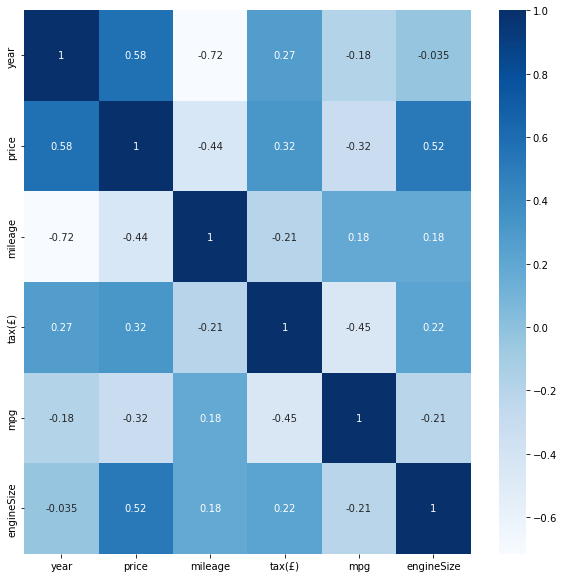

In [4]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(hyu.corr(),cbar=True,annot=True,cmap='Blues')

### Positive Correlation
price: year,tax,engineSize  <br>
mileage: mpg,engineSize  <br>
tax: year, price, engineSize  <br>

    
### Negative Correlation
year: mileage,mpg,engineSize  <br>
mpg: year, price,tax,engineSize  <br>

### Questions to ask

1. Relationship between year and price <br>
    According to me, as year increases price increases
2. Relationship between year and transmission <br>
    According to me, past were Manual cars now the Automatic cars
3. Relationship between year and engineSize <br>
    According to me, as year increased engineSize decreased
4. Relationship between transmission and fuelType <br>
    According to me, in India mostly Automatic cars are Petrol
5. Relationship between transmission and mpg <br>
    According to me, as automatic transmission does not give you good mpg
6. Relationship between fueltype and mileage <br>
    According to me, as diesel car gives more mileage
7. Relationship between transmission and tax <br>
    According to me, automatic cars have more tax
8. Realtion between tax and price 
9. Relation between price and transmission
10. Relation between mileage and engineSize
11. Which car model of Hyundai sold the most?  
12. Which Transmission or type of car is still most used?  
13. Which fuel is still on high usage?  

### Relationship between year and price

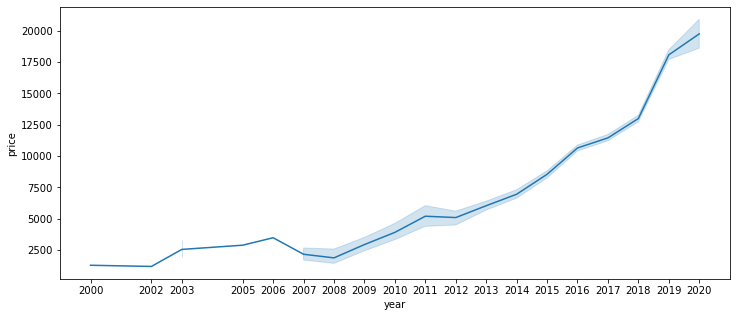

In [58]:
plt.figure(figsize=(12,5))
fig=sns.lineplot(x="year",y="price",data=hyu)
fig.set_xticks(hyu["year"].unique())

### Result
As per assumed, the price of car increases as the year increases.<br> 
Which can be due to many factors but it will surely increase in long run.

### Fact
We can see the downfall in 2007 that is beacuse of Automotive industry crisis of 2007–2010 that was part of financial crisis 2007-2008.

### We can see it in every car model also

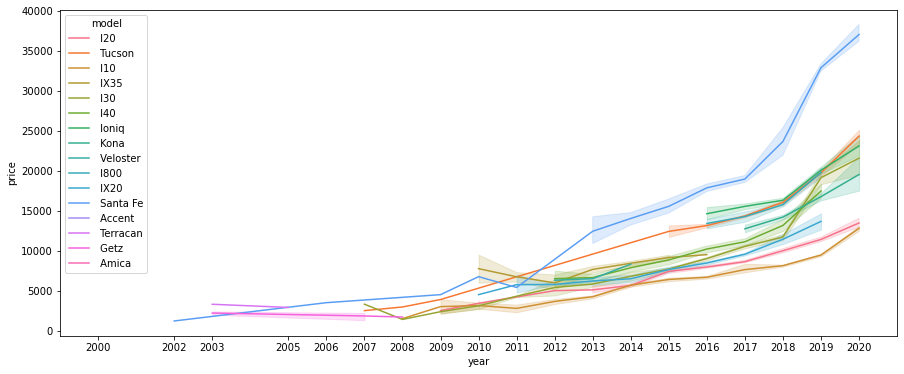

In [59]:
plt.figure(figsize=(15,6))
model_fig=sns.lineplot(x="year",y="price",data=hyu,hue="model")
model_fig.set_xticks(hyu["year"].unique())

### Relationship between year and transmission

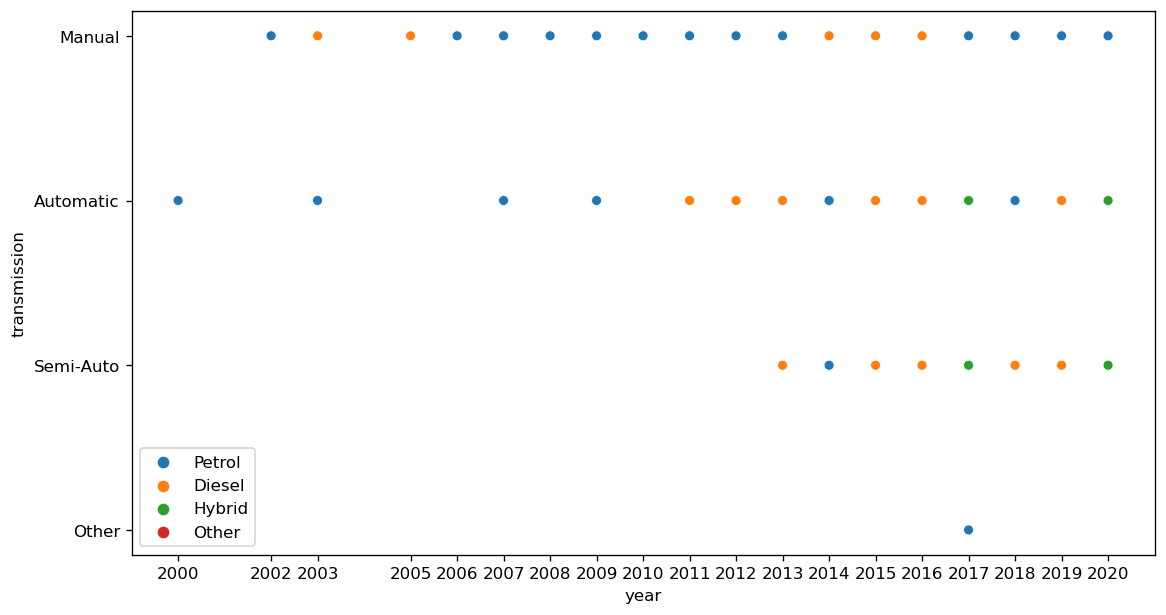

In [103]:
plt.figure(figsize=(11,6),dpi=120)
a=sns.scatterplot(x="year",y="transmission",data=hyu,hue="fuelType")
a.set_xticks(hyu["year"].unique())
plt.legend(loc='lower left')

### Result
We can see the no. of manual cars look constanst throughout.<br> But the no. of automatic, semi-automatic cars have
rised after 2010 and Hybrid cars are still very less.

### Relationship between year and engineSize

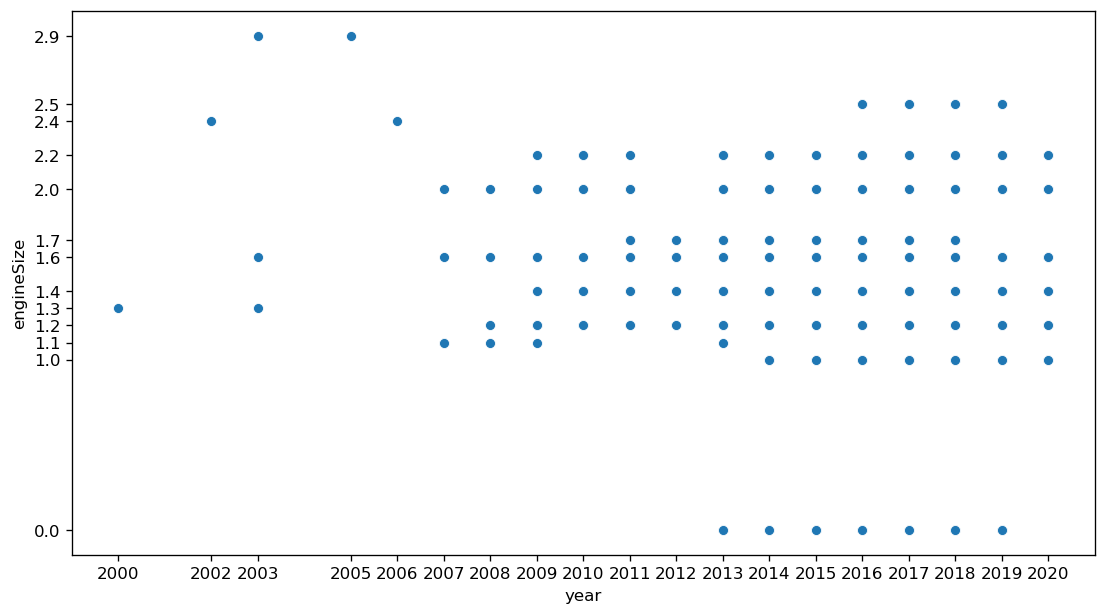

In [107]:
plt.figure(figsize=(11,6),dpi=120)
a=sns.scatterplot(x="year",y="engineSize",data=hyu)
a.set_xticks(hyu["year"].unique())
#plt.legend(loc='lower left')
a.set_yticks(hyu["engineSize"].unique())

### Result
There is no relation between engineSize and year.<br> We can largely say that, new cars doesn't have big engine size.

### Relationship between transmission and fuelType

In [133]:
pd.DataFrame(hyu.groupby("transmission")["fuelType"].value_counts())

fuelType
transmission fuelType          
Automatic    Hybrid         286
             Diesel         218
             Petrol         164
             Other            1
Manual       Petrol        2521
             Diesel        1069
             Hybrid          21
Other        Hybrid           1
             Petrol           1
Semi-Auto    Diesel         321
             Petrol         216
             Hybrid          41

### Result
Mostly manual cars on petrol runs on road.<br> Even we can see semi-auto are more than automatic.<br>
People buy semi-auto cars on diesel more.<br> And automatic cars are hybrid mostly. <br>
Mostly hybrid cars are automatic.

### Relationship between transmission and mpg

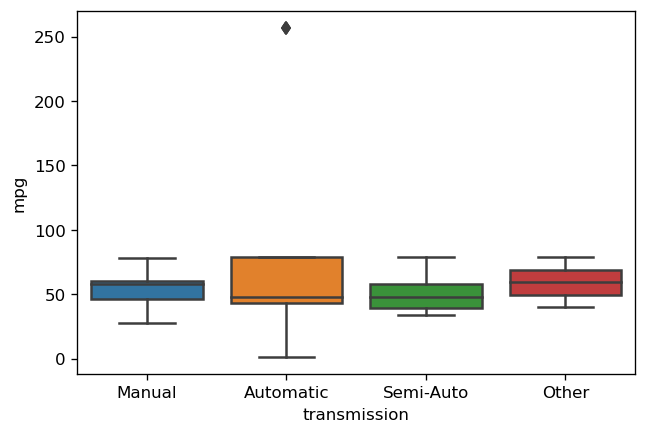

In [225]:
plt.figure(dpi=120)
trans=sns.boxplot(x="transmission",y="mpg",data=hyu)

In [154]:
hyu.pivot_table(index="transmission",values="mpg", aggfunc="mean")

,mpg
transmission,
Automatic,57.177280
Manual,54.155276
Other,59.150000
Semi-Auto,47.886678


### Result
We will avoid seeing 'other' row.<br>
Here we can see Automatic cars gives more mpg. But in above boxplot we can see it has an outlier.<br>
So, we'll conclude that Semi-auto cars gives worst mpg and automatic, manual are almost same.

### Relationship between fueltype and mileage

<AxesSubplot:xlabel='fuelType', ylabel='mileage'>

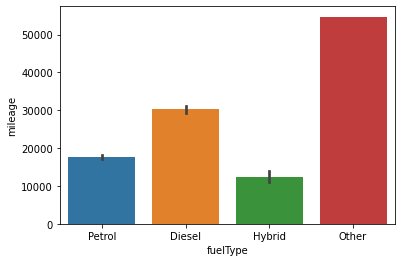

In [176]:
sns.barplot(x="fuelType",y="mileage",data=hyu)

<AxesSubplot:xlabel='fuelType', ylabel='mileage'>

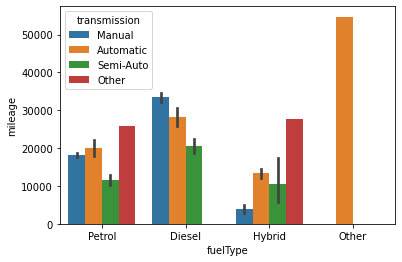

In [175]:
sns.barplot(x="fuelType",y="mileage",data=hyu,hue="transmission")

### Result
In 1st graph<br> Avoiding Other, we can see that Diesel gives the best mileage followed by petrol and then hybrid.<br><br>
In 2nd graph<br>
We can see Manual Diesel is best car for maximum mileage option.<br>
We can say Automatic petrol cars give more mileage than manual petrol cars.<br>
And Automatic hybrid cars are good for mileage.


### Relationship between transmission and tax

In [183]:
hyu.pivot_table(index="transmission",values="price", aggfunc="mean")

,price
transmission,
Automatic,16369.224215
Manual,11059.049571
Other,14745.000000
Semi-Auto,19119.217993


In [184]:
hyu.pivot_table(index="transmission",values="tax(£)", aggfunc="mean")

,tax(£)
transmission,
Automatic,151.449925
Manual,111.147881
Other,72.500000
Semi-Auto,148.711073


### Result
We can see the price of Semi-auto cars is highest followed by automatic cars.<br>
But still the tax is highest on automatic cars followed by semi-auto cars.

### Realtion between tax and price

<AxesSubplot:xlabel='tax(£)', ylabel='price'>

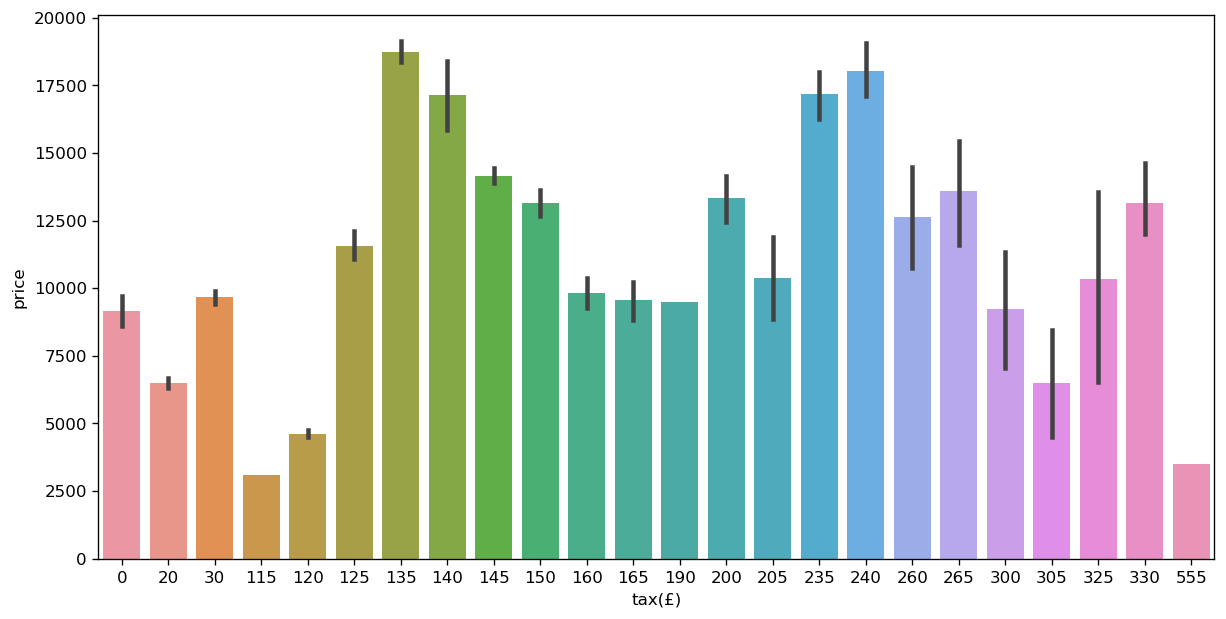

In [198]:
plt.figure(figsize=(12,6),dpi=120)
sns.barplot(y="price",x="tax(£)",data=hyu)

### Result
There is no relation which can be figured out between price and tax.

### Relation between price and transmission 

<AxesSubplot:xlabel='transmission', ylabel='price'>

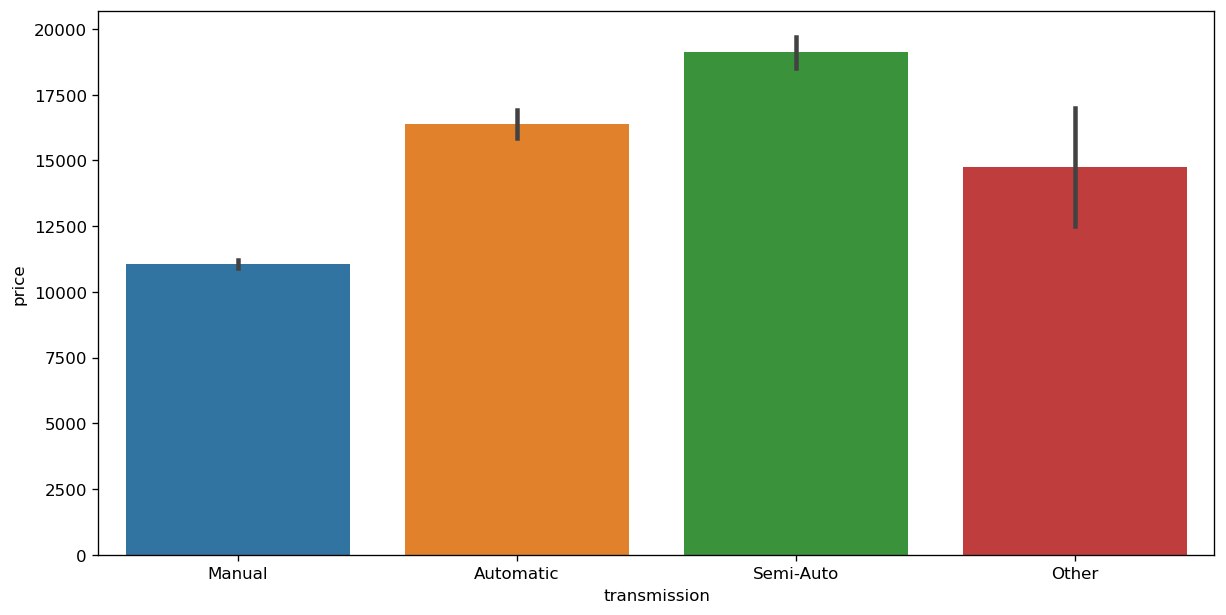

In [201]:
plt.figure(figsize=(12,6),dpi=120)
sns.barplot(y="price",x="transmission",data=hyu)

### Result
As seen Semi-auto cars are the costliest of all, then automatic cars .

### Relation between mileage and engineSize

<AxesSubplot:xlabel='engineSize', ylabel='mileage'>

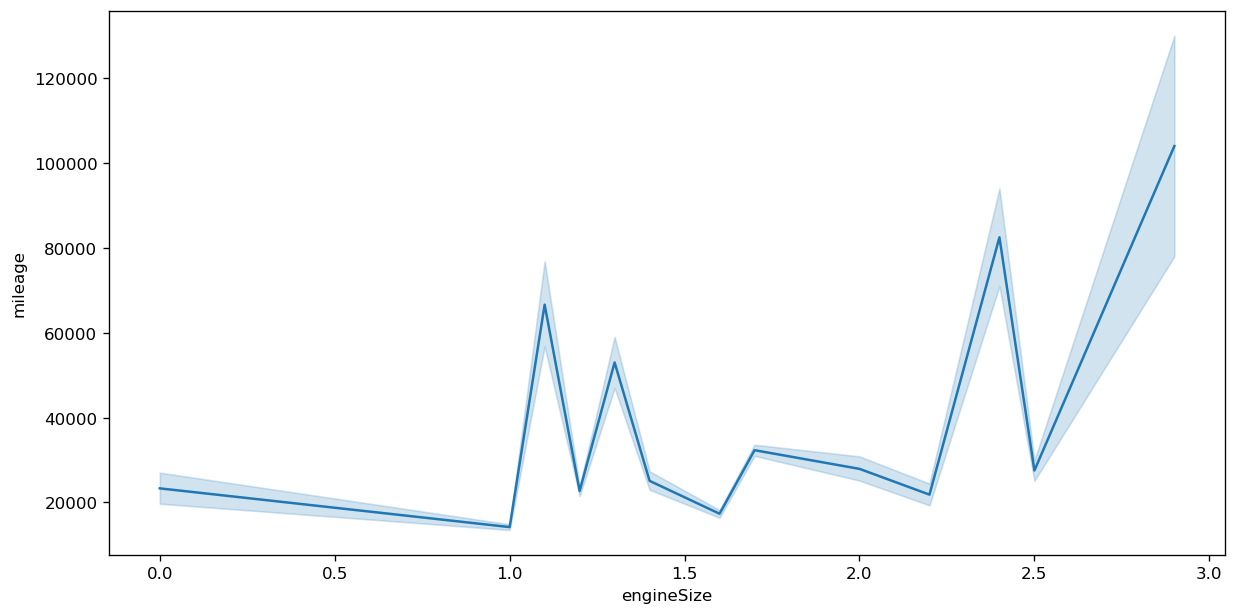

In [205]:
plt.figure(figsize=(12,6),dpi=120)
sns.lineplot(y="mileage",x="engineSize",data=hyu)

### Result
Here no pattern can't be seen. So, no relation between mileage and engineSize.<br>
They are independent of each other.

### Which car model of Hyundai sold the most? 

In [215]:
hyu.groupby("model")["year"].count().sort_values(ascending=False)

model
 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: year, dtype: int64

### Result
We can see the most appreciated car by the customers of Hyundai is `Tuscon`. <br>
At second most position comes `I10`

###  Which Transmission or type of car is still most used? 

In [234]:
hyu.groupby("transmission")['model'].count().sort_values()

transmission
Other           2
Semi-Auto     578
Automatic     669
Manual       3611
Name: model, dtype: int64

### Result
Here, it is clear that still drivers of Manual cars are more than any other.

### Which fuel is still on high usage? 

In [222]:
hyu.groupby("fuelType")["transmission"].count().sort_values()

fuelType
Other        1
Hybrid     349
Diesel    1608
Petrol    2902
Name: transmission, dtype: int64

### Result
Still the petrol is mostly used for cars.

# Model

In [6]:
hyu.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [5]:
#training data
train_data=hyu.sample(frac=0.80)
train_data

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
996,Santa Fe,2019,34000,Semi-Auto,5931,Diesel,145,39.2,2.2
821,I30,2017,11799,Manual,16853,Diesel,0,74.3,1.6
307,Tucson,2017,13998,Manual,19372,Diesel,150,61.7,1.7
2034,I20,2017,8982,Manual,9207,Petrol,145,55.4,1.2
3239,I30,2017,10800,Manual,8092,Petrol,145,56.5,1.0
...,...,...,...,...,...,...,...,...,...
1980,I30,2015,6981,Manual,53825,Diesel,0,78.4,1.6
1936,I10,2017,7350,Manual,17531,Petrol,20,60.1,1.0
709,I10,2020,11895,Manual,1000,Petrol,145,56.5,1.0
3774,Tucson,2019,15278,Manual,11036,Petrol,145,35.3,1.6


In [6]:
# Test data
test_data=hyu.sample(frac=0.2)
test_data

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
1410,I800,2018,15949,Manual,31007,Diesel,145,31.7,2.5
1951,Tucson,2016,15000,Manual,26000,Diesel,125,58.9,2.0
4671,I30,2018,10600,Manual,12304,Diesel,145,74.3,1.6
3736,I40,2019,16500,Manual,10,Diesel,145,52.3,1.6
71,I10,2017,7600,Manual,15618,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
440,I30,2015,7998,Manual,21575,Diesel,20,72.4,1.6
3273,Tucson,2017,13250,Manual,285,Diesel,145,61.7,1.7
4699,I30,2017,10995,Manual,2000,Petrol,145,48.7,1.4
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6


In [7]:
dict={"mileage":train_data.mileage,"price":train_data.price}
dict=pd.DataFrame(dict)
dict

,mileage,price
996,5931,34000
821,16853,11799
307,19372,13998
2034,9207,8982
3239,8092,10800
...,...,...
1980,53825,6981
1936,17531,7350
709,1000,11895
3774,11036,15278


<AxesSubplot:xlabel='mileage', ylabel='price'>

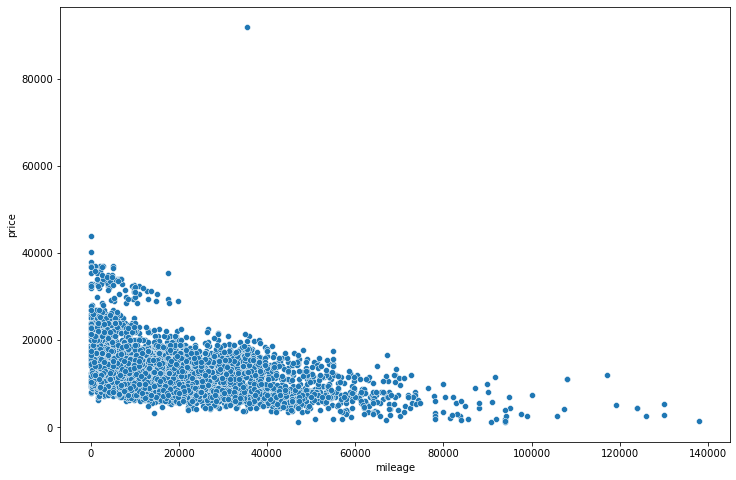

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="mileage",y="price",data=train_data)


# Linear Regression

(array([1567., 1107.,  739.,  289.,  112.,   36.,   23.,    7.,    4.,
           4.]),
 array([1.000000e+00, 1.380090e+04, 2.760080e+04, 4.140070e+04,
        5.520060e+04, 6.900050e+04, 8.280040e+04, 9.660030e+04,
        1.104002e+05, 1.242001e+05, 1.380000e+05]),
 <BarContainer object of 10 artists>)

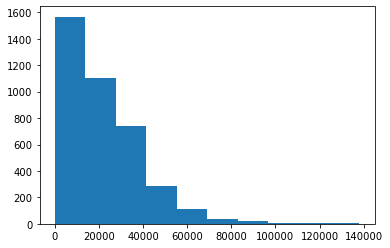

In [9]:
X=np.array(train_data.mileage).reshape(-1,1)
y=train_data.price
plt.hist(dict["mileage"])

In [10]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
model=LinearRegression()
model.fit(X,y)
print(f"c={model.intercept_}, m={model.coef_}") # theta0,theta1

c=15954.828467962207, m=[-0.15008492]


4199.7535932597075
0.21674806428629578


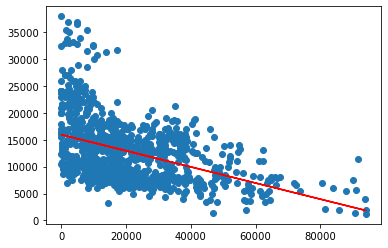

In [11]:
X_new=np.array(test_data.mileage).reshape(-1,1)
y_new=np.array(test_data.price)
yy=model.predict(X_new)
plt.scatter(X_new,y_new)
plt.plot(X_new,yy,"r")
#print(mse(y_new,yy)) #error
print(np.abs(y_new-yy).sum()/len(y_new))
acc=sklearn.metrics.r2_score(y_new,yy)
print(acc)

# trying to Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

(array([1567., 1107.,  739.,  289.,  112.,   36.,   23.,    7.,    4.,
           4.]),
 array([-1.21437005, -0.43996612,  0.33443781,  1.10884174,  1.88324567,
         2.65764959,  3.43205352,  4.20645745,  4.98086138,  5.75526531,
         6.52966924]),
 <BarContainer object of 10 artists>)

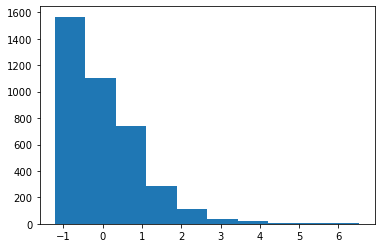

In [13]:
X_tr=scaler.fit_transform(dict)
X_tr=pd.DataFrame(X_tr,index=dict.index,columns=dict.columns)
X_tr
plt.hist(X_tr["mileage"])